NAME: HITARTH BHATT   SAP-ID: 60009220209   BATCH: D1-2

In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# Normalize and reshape the data
x_train = x_train / 255.0
x_test = x_test / 255.0

# Check the shape of the arrays
print(f"x_train shape: {x_train.shape}")
print(f"x_test shape: {x_test.shape}")

# Flatten the images
x_train = x_train.reshape(-1, 28 * 28)
x_test = x_test.reshape(-1, 28 * 28)

# One-hot encode the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

x_train shape: (60000, 28, 28)
x_test shape: (10000, 28, 28)


In [ ]:
def create_model(optimizer):
  model = tf.keras.Sequential([
        tf.keras.layers.Dense(128, activation='relu', input_shape=(784,)),
        tf.keras.layers.Dense(10, activation='softmax')
    ])
  model.compile(
      optimizer = optimizer,
      loss = 'categorical_crossentropy',
      metrics = ['accuracy']
  )
  return model

In [ ]:
batch_size = 32
epochs = 10

In [ ]:
def train_evaluate(optimizer):
    model = create_model(optimizer)
    history = model.fit(
        x_train, y_train,
        validation_data=(x_test, y_test),
        epochs=epochs,
        batch_size=batch_size,
        verbose=0
    )
    # Evaluate the model on the test set
    loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
    return history, loss, accuracy

In [ ]:
optimizers = [
    ('GradientDescent',tf.keras.optimizers.SGD(learning_rate=0.01)),
    ('Stocastic GradientDescent',tf.keras.optimizers.SGD()),
    ('Stocastic GradientDescent With Momentum',tf.keras.optimizers.SGD(momentum=0.9)),
    ('Mini-Batch SGD',tf.keras.optimizers.SGD(momentum=0.9,nesterov=True)),
    ('Adagrad',tf.keras.optimizers.Adagrad()),
    ('RMSProp',tf.keras.optimizers.RMSprop()),
    ('AdaDelta',tf.keras.optimizers.Adadelta()),
    ('Adam',tf.keras.optimizers.Adam())
]

In [ ]:
histories = {}
test_losses = {}
test_accuracies = {}

# Iterate over the optimizers and collect results
for name, optimizer in optimizers:
    print(f"Training with {name} optimizer...")
    history, loss, accuracy = train_evaluate(optimizer)
    histories[name] = history
    test_losses[name] = loss
    test_accuracies[name] = accuracy
    print(f"{name} optimizer test loss: {loss:.4f}, test accuracy: {accuracy:.4f}")
print("\nFinal Accuracies:")
for name, accuracy in accuracies.items():
    print(f"{name}: {accuracy:.4f}")

Training with GradientDescent optimizer...
GradientDescent optimizer test loss: 0.1604, test accuracy: 0.9534
Training with Stocastic GradientDescent optimizer...
Stocastic GradientDescent optimizer test loss: 0.1657, test accuracy: 0.9525
Training with Stocastic GradientDescent With Momentum optimizer...
Stocastic GradientDescent With Momentum optimizer test loss: 0.0679, test accuracy: 0.9791
Training with Mini-Batch SGD optimizer...
Mini-Batch SGD optimizer test loss: 0.0720, test accuracy: 0.9772
Training with Adagrad optimizer...
Adagrad optimizer test loss: 0.3216, test accuracy: 0.9135
Training with RMSProp optimizer...
RMSProp optimizer test loss: 0.0866, test accuracy: 0.9779
Training with AdaDelta optimizer...
AdaDelta optimizer test loss: 1.0768, test accuracy: 0.7888
Training with Adam optimizer...
Adam optimizer test loss: 0.0754, test accuracy: 0.9789

Final Accuracies:
GradientDescent: 0.9548
Stocastic GradientDescent: 0.9527
Stocastic GradientDescent With Momentum: 0.97

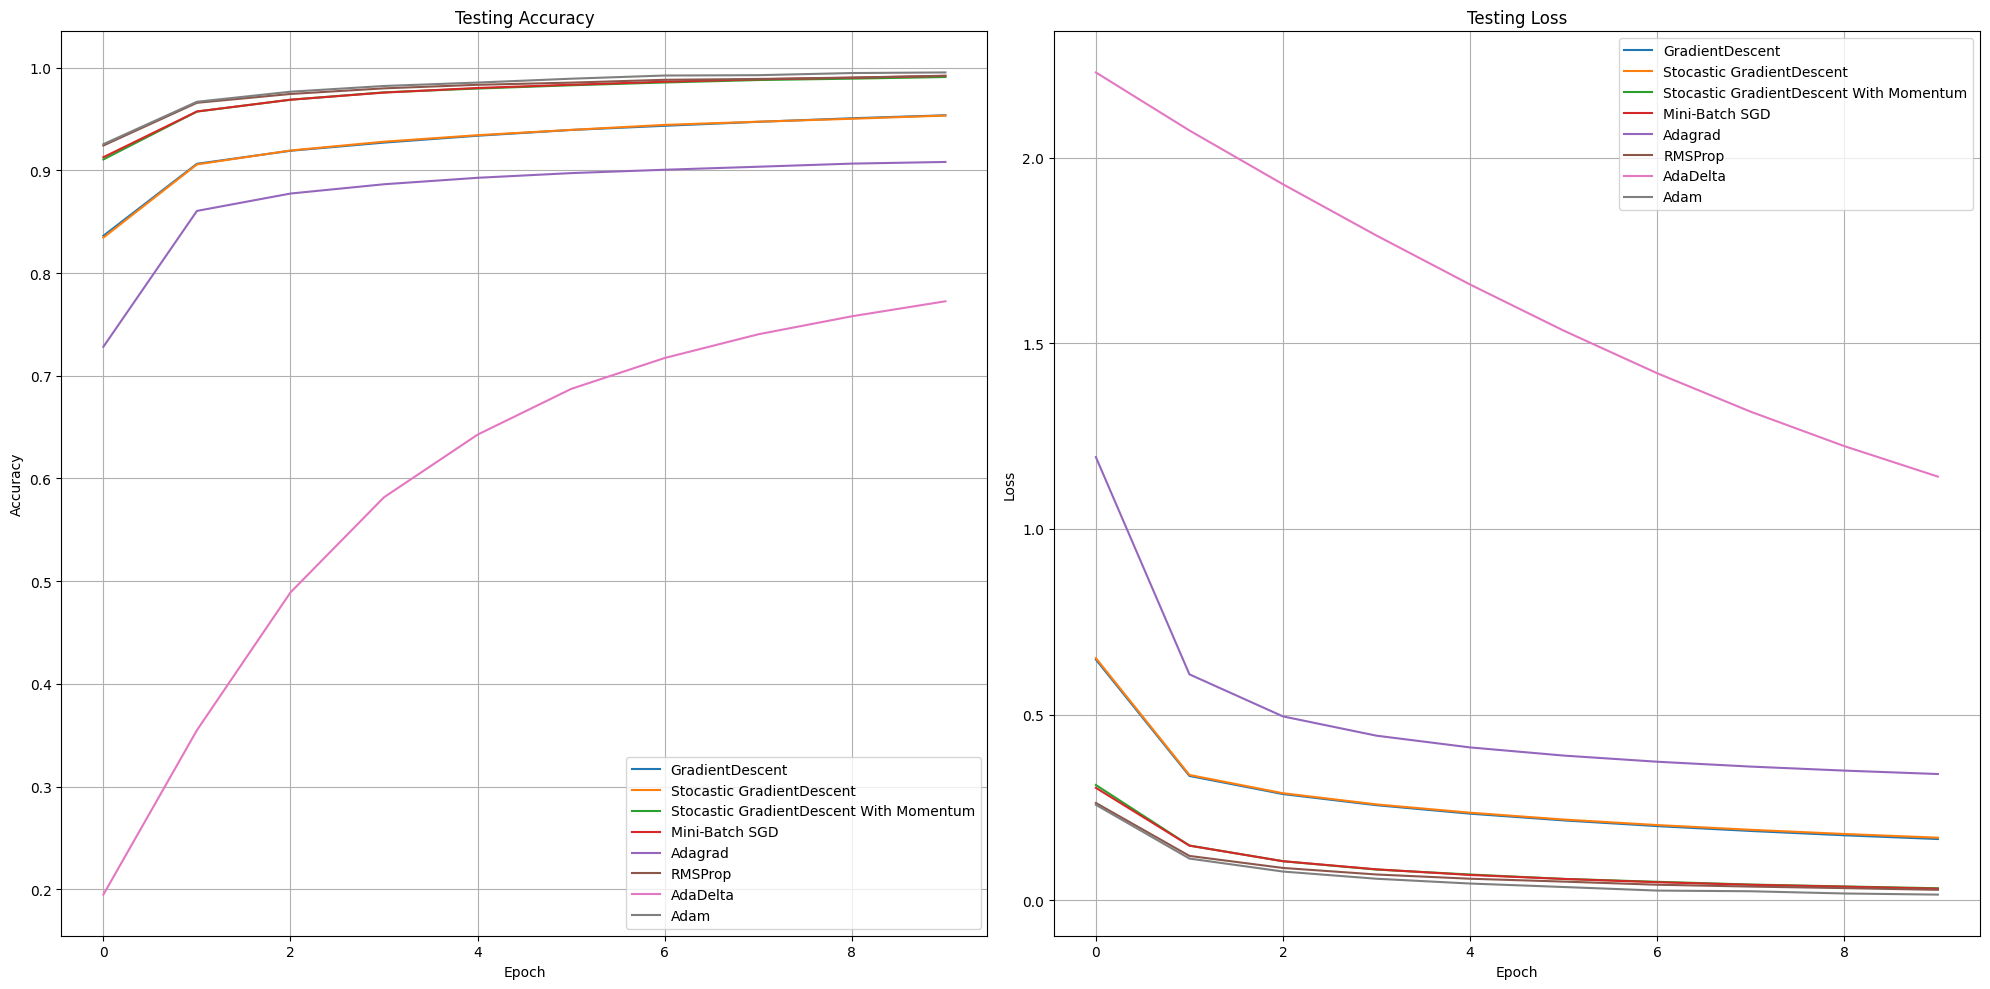

In [ ]:
def plot_results(histories, test_losses, test_accuracies):
    plt.figure(figsize=(20, 10))

    # Plot Testing Accuracy
    plt.subplot(1, 2, 1)
    for name, history in histories.items():
        plt.plot(history.history['accuracy'], label=name)
    plt.title('Testing Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)

    # Plot Testing Loss
    plt.subplot(1, 2, 2)
    for name, history in histories.items():
        plt.plot(history.history['loss'], label=name)
    plt.title('Testing Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

# Plot the results
plot_results(histories, test_losses, test_accuracies)